classe : <class 'numpy.ndarray'>
type : uint8
taille : (1363, 1536, 3)


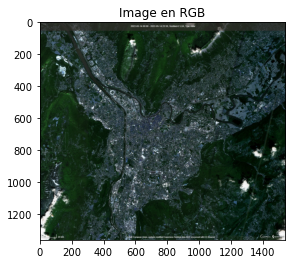

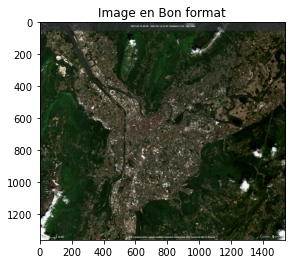

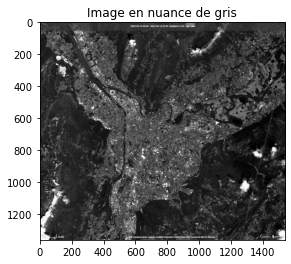

taille de l'image en nuance de gris : (1363, 1536)
On segmente l'image selon 3 seuils


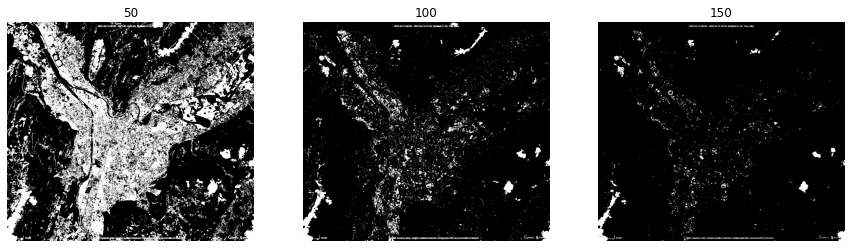

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# importer une image
image = cv2.imread('/Users/jouneidgff/Downloads/sentinel2.jpg') #Ouvrir l'image  avec openCv
# informations de l' image 
print( 'classe :', type(image) ) 
print( 'type :', image.dtype )
print( 'taille :', image.shape )

# La commande plt.imshow() affiche une image en mode RGB (rouge, vert, bleu) qui est le pire format
plt.imshow(image)
plt.title('Image en RGB')

plt.show()


#On réassemble dans le bon ordre pour faire apparaitre l'image dans les bonnes couleurs 
b, g, r = cv2.split(image)
image = cv2.merge([r, g, b])
plt.imshow(image)
plt.title('Image en Bon format')

plt.show()



#Image en nuance de gris

grey_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # On passe du RGB au gris
plt.imshow(grey_image, cmap = 'Greys_r')
plt.title('Image en nuance de gris')

plt.show()
print("taille de l'image en nuance de gris :", grey_image.shape)


            
            
# Segmentation
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,8))

# Transformer l’image en nuance de gris
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Les seuils de la segmentation
seuils = [50, 100, 150]
for i, seuil in enumerate(seuils):
    val , seg_image = cv2.threshold(grey_image, seuil, 255, cv2.THRESH_BINARY)
    axs[i].imshow(seg_image, cmap = 'Greys_r')
    axs[i].set_title(seuil)
    axs[i].set_axis_off()
print("On segmente l'image selon 3 seuils")

#La segmentation permet d' observer les frontières entres les zones
    
    

In [11]:
# Histogramme en rgb 
def show_img(path):

    img = cv2.imread(path)
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
    hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
    plt.plot(hist_r, color='r', label="r")
    plt.plot(hist_g, color='g', label="g")
    plt.plot(hist_b, color='b', label="b")
    plt.title( 'Histogramme RGB')
    plt.legend()
    plt.show() 

    return hist_r,hist_g, hist_b, 

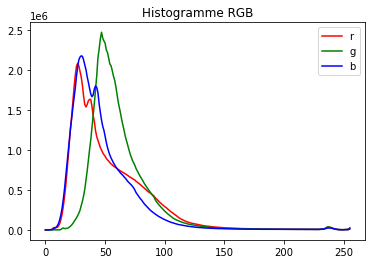

(array([[1.500000e+01],
        [9.000000e+00],
        [1.300000e+01],
        [4.100000e+01],
        [5.230000e+02],
        [2.707000e+03],
        [1.557500e+04],
        [2.800700e+04],
        [2.888700e+04],
        [2.898100e+04],
        [3.393100e+04],
        [5.082000e+04],
        [7.966900e+04],
        [1.317450e+05],
        [1.993600e+05],
        [2.960560e+05],
        [4.121910e+05],
        [5.485980e+05],
        [7.139650e+05],
        [8.961930e+05],
        [1.092089e+06],
        [1.269290e+06],
        [1.425429e+06],
        [1.604856e+06],
        [1.780053e+06],
        [1.930765e+06],
        [2.045196e+06],
        [2.081971e+06],
        [2.049425e+06],
        [1.977835e+06],
        [1.910812e+06],
        [1.807424e+06],
        [1.670233e+06],
        [1.566353e+06],
        [1.536718e+06],
        [1.568971e+06],
        [1.614833e+06],
        [1.632581e+06],
        [1.629820e+06],
        [1.545524e+06],
        [1.427556e+06],
        [1.35379

In [12]:
show_img('/Users/jouneidgff/Downloads/sentinel2.jpg')

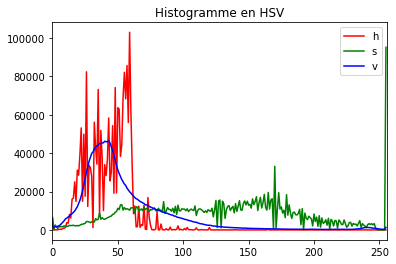

In [7]:
# Histogramme HSV
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img=cv.imread ('/Users/jouneidgff/Downloads/sentinel2.jpg');


#RGB -> HSV.
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) #l’image est mise en mémoire, puis convertis en hsv grâce à cvtColor
#Déclaration des couleurs des courbes
color = ('r','g','b')
#Déclaration des noms des courbes.
labels = ('h','s','v')
#Pour col allant r à b et pour i allant de 0 au nombre de couleurs
for i,col in enumerate(color): #une boucle qui va itérer sur chaque canal de l’image est créée
    #Hist prend la valeur de l'histogramme de hsv sur la canal i.
    hist = cv.calcHist([hsv],[i],None,[256],[0,256]) #L’histogramme du canal courant est obtenu en utilsant calcHist
    # Plot de hist.
    plt.plot(hist,color = col,label=labels[i])
    plt.xlim([0,256])
#Affichage.

plt.legend()
plt.title('Histogramme en HSV')
plt.show()

 

taille de l'image en hsv : (8625, 9930, 3)


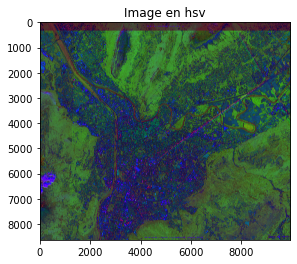

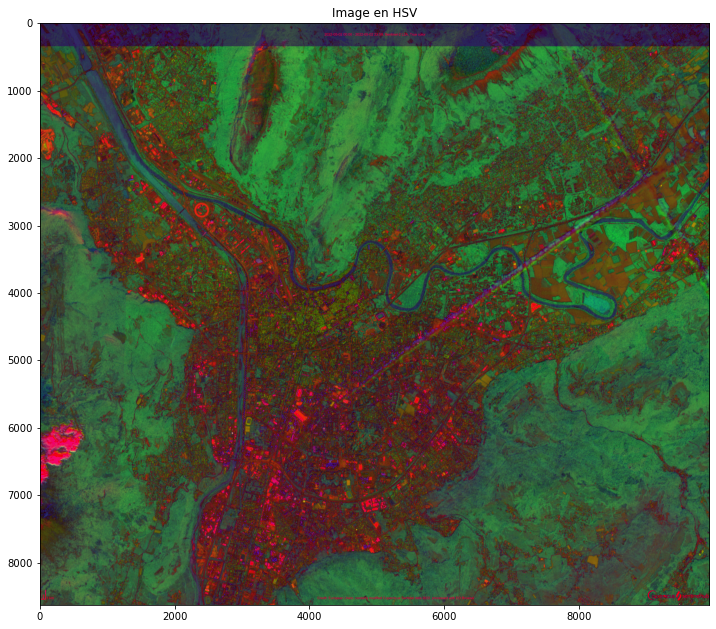

In [14]:
#image en hsv
import cv2
img=cv2.imread ('//Users/jouneidgff/Downloads/Projet2;Jpeg.jpg') #ouverture de l'image avec openCv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #cvtColor convertit l'image BGR en HSV
# cv2.namedWindow('hsv', cv2.WINDOW_NORMAL) #permet d'ouvrir l'image dans une nouvelle fenêtre avec opencv,
# cv2.imshow('hsv',hsv)
# cv2.destroyAllWindows()
#matrice

import matplotlib.pyplot as plt

plt.imshow(hsv)
plt.title('Image en hsv') 

#Image améliorée
plt.figure(figsize=(12,12)) # On agrandit l'image
plt.imshow(hsv[:,:,::-1]) # On inverse les couleurs pour que vert=végétation, bleu=eau, rouge= ville
plt.title('Image en HSV')
print("taille de l'image en hsv :", hsv.shape)
plt.savefig('//Users/jouneidgff/Downloads/Projet2;saved.jpg') # enregistrer

taille de l'image en hsv : (292, 512, 3)


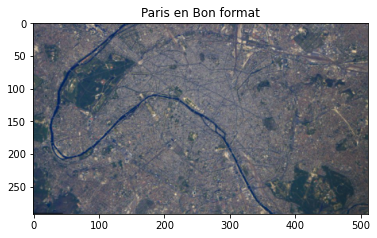

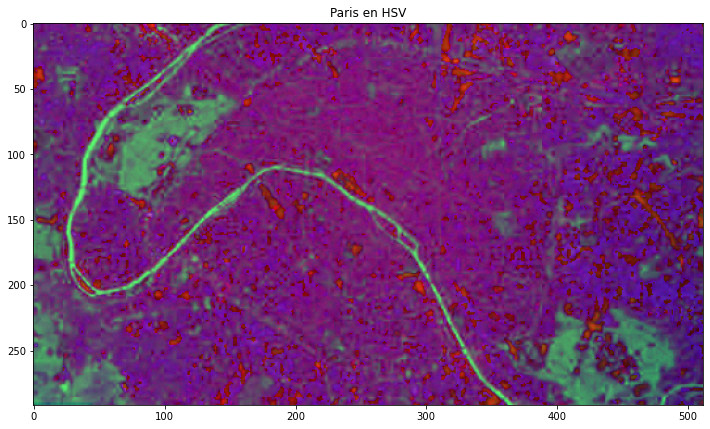

In [19]:
#essai avec paris
#image en hsv
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('//Users/jouneidgff/Desktop/paris.png') #ouverture de l'image avec openCv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #cvtColor convertit l'image BGR en HSV
# cv2.namedWindow('hsv', cv2.WINDOW_NORMAL) #permet d'ouvrir l'image dans une nouvelle fenêtre avec opencv,
# cv2.imshow('hsv',hsv)
# cv2.destroyAllWindows()
#matrice

import matplotlib.pyplot as plt

plt.imshow(hsv)
plt.title('Paris en hsv') 

#On réassemble dans le bon ordre pour faire apparaitre l'image dans les bonnes couleurs 
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img)
plt.title('Paris en Bon format')

#Image améliorée
plt.figure(figsize=(12,12)) # On agrandit l'image
plt.imshow(hsv[:,:,::-1]) # On inverse les couleurs pour que vert=végétation, bleu=eau, rouge= ville
plt.title('Paris en HSV')
print("taille de l'image en hsv :", hsv.shape)
plt.savefig('//Users/jouneidgff/Downloads/Projet2;saved.jpg') # enregistrer


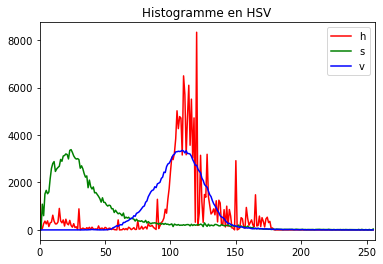

In [20]:
# Histogramme HSV
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img=cv.imread ('//Users/jouneidgff/Desktop/paris.png');


#RGB -> HSV.
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) #l’image est mise en mémoire, puis convertis en hsv grâce à cvtColor
#Déclaration des couleurs des courbes
color = ('r','g','b')
#Déclaration des noms des courbes.
labels = ('h','s','v')
#Pour col allant r à b et pour i allant de 0 au nombre de couleurs
for i,col in enumerate(color): #une boucle qui va itérer sur chaque canal de l’image est créée
    #Hist prend la valeur de l'histogramme de hsv sur la canal i.
    hist = cv.calcHist([hsv],[i],None,[256],[0,256]) #L’histogramme du canal courant est obtenu en utilsant calcHist
    # Plot de hist.
    plt.plot(hist,color = col,label=labels[i])
    plt.xlim([0,256])
#Affichage.

plt.legend()
plt.title('Histogramme en HSV')
plt.show()

In [4]:
#capturer les lignes
import sys
import math
import cv2 as cv
import numpy as np
def main(argv):
    
    default_file = '/Users/jouneidgff/Downloads/pentagone.jpg'
    filename = argv[0] if len(argv) > 0 else default_file
    # charge une image
    src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
    # regarde si l'image a bien été chargée
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    #détecte les bords de l'image grace à un filtre de canny
    dst = cv.Canny(src, 50, 200, None, 3)
    
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    
    #Tranformée standard de hough grâce à la bibliothèque opencv
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    #trace les lignes détectées
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
            
    
    #Transformée de Hough probabiliste        
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    #on affiche les résultats obtenus
    cv.imshow("Image source", src)
    cv.imshow("Lignes détectées - Transformée Standard de Hough", cdst)
    cv.imshow("Lignes détectées - Transformée Probabiliste de Hough", cdstP)
    
    #on attend que l'utilisateur quitte le programme
    cv.waitKey()
    return 0
    
if __name__ == "__main__":
    main(sys.argv[1:])

[ WARN:0@190.102] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/utils/samples.cpp (61) findFile cv::samples::findFile('-f') => ''


error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/utils/samples.cpp:64: error: (-2:Unspecified error) OpenCV samples: Can't find required data file: -f in function 'findFile'
